In [12]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, 'Data')
print(data_dir)

/root/GreenAI/Cloud/4090/Data


In [14]:
# read the model info, including the model name, the number of parameters, and the number of MACs
# read the model training info, including the training time, each layer's training time, the epoch time and the epoch energy data
data_model_dir = os.path.join(data_dir, 'model_info')
# read all the json fiiels in the data_model_dir
fashionmnist_modelinfodict = json.load(open(os.path.join(data_model_dir, 'fashionmnist_modelinfodict.json')))
cifar100_modelinfodict = json.load(open(os.path.join(data_model_dir, 'cifar100_modelinfodict.json')))
cifar10_modelinfodict = json.load(open(os.path.join(data_model_dir, 'cifar10_modelinfodict.json')))
model_datapath_c10 = json.load(open(os.path.join(data_model_dir, 'model_data_c10.json')))                               
model_datapath_c = json.load(open(os.path.join(data_model_dir, 'model_data_c.json')))
model_datapath_f = json.load(open(os.path.join(data_model_dir, 'model_data_f.json')))
print('the model info of fashionmnist is:', fashionmnist_modelinfodict,'\n',
      'the model info of cifar100 is:', cifar100_modelinfodict, '\n', 
      'the model info of cifar10 is:', cifar10_modelinfodict)
print('the model training info of fashionmnist is in the path:', model_datapath_f, '\n',
      'the model training info of cifar100 is in the path:', model_datapath_c, '\n',
      'the model training info of cifar10 is in the path:', model_datapath_c10)

the model info of fashionmnist is: {'Alexnet': [665530000.0, 57030000.0], 'VGG11': [7580000000.0, 128810000.0], 'VGG13': [11300000000.0, 128990000.0], 'VGG16': [15460000000.0, 134300000.0], 'ResNet18': [1750000000.0, 11180000.0], 'ResNet34': [3600000000.0, 21290000.0], 'ResNet50': [2320000000.0, 13870000.0], 'GoogleNet': [1520000000.0, 5980000.0], 'GoogleNet_mod0': [406930000.0, 120070.0], 'GoogleNet_mod1': [1090000000.0, 3420000.0], 'GoogleNet_mod2': [1870000000.0, 7280000.0], 'GoogleNet_mod3': [2740000000.0, 11710000.0], 'GoogleNet_mod4': [3710000000.0, 16700000.0], 'GoogleNet_mod5': [455030000.0, 426780.0], 'GoogleNet_mod6': [578900000.0, 1320000.0], 'GoogleNet_mod7': [778240000.0, 2790000.0], 'GoogleNet_mod8': [1050000000.0, 4840000.0], 'GoogleNet_mod9': [544400000.0, 738300.0], 'GoogleNet_mod10': [688040000.0, 1400000.0], 'GoogleNet_mod11': [837560000.0, 2100000.0], 'GoogleNet_mod12': [992940000.0, 2830000.0], 'MobileNetV1': [567250000.0, 3210000.0], 'MobileNetV2': [325920000.0, 2

In [15]:
# fashionmnist data，read the model_data_f
ModelData_f = {}
for model_name, model_data_path in model_datapath_f.items():
    # the path is like /root/GreenAI/Cloud/4090/Data/alexnet_AllLayers/fashion_mnist/E20_B256_R0, but need to change to /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/alexnet_AllLayers/fashion_mnist/E20_B256_R0
    # model_data_path = model_data_path.replace('/root/GreenAI/Cloud/4090', '/Users/dtjgp/Learning/GreenAI/Cloud/4090')
    # read the data from the model_data_path, load the npy file
    LayersTime = np.load(os.path.join(model_data_path, 'Layers_time.npy'), allow_pickle=True)
    TrainPartTime = np.load(os.path.join(model_data_path, 'Train_part_time.npy'), allow_pickle=True)
    EpochTime = np.load(os.path.join(model_data_path, 'Epoch_time.npy'), allow_pickle=True)
    EpochEnergy = np.load(os.path.join(model_data_path, 'Epoch_energy.npy'), allow_pickle=True)
    ModelData_f[model_name] = {'LayersTime': LayersTime, 'TrainPartTime': TrainPartTime, 'EpochTime': EpochTime, 'EpochEnergy': EpochEnergy}

# cifar100 data，read the model_data_c
ModelData_c = {}
for model_name, model_data_path in model_datapath_c.items():
    model_data_path = model_data_path.replace('/root/GreenAI/Cloud/4090', '/Users/dtjgp/Learning/GreenAI/Cloud/4090')
    LayersTime = np.load(os.path.join(model_data_path, 'Layers_time.npy'), allow_pickle=True)  
    TrainPartTime = np.load(os.path.join(model_data_path, 'Train_part_time.npy'), allow_pickle=True)
    EpochTime = np.load(os.path.join(model_data_path, 'Epoch_time.npy'), allow_pickle=True)
    EpochEnergy = np.load(os.path.join(model_data_path, 'Epoch_energy.npy'), allow_pickle=True)
    ModelData_c[model_name] = {'LayersTime': LayersTime, 'TrainPartTime': TrainPartTime, 'EpochTime': EpochTime, 'EpochEnergy': EpochEnergy}
    
# cifar10 data，read the model_data_c
ModelData_c10 = {}
for model_name, model_data_path in model_datapath_c10.items():
    model_data_path = model_data_path.replace('/root/GreenAI/Cloud/4090', '/Users/dtjgp/Learning/GreenAI/Cloud/4090')
    LayersTime = np.load(os.path.join(model_data_path, 'Layers_time.npy'), allow_pickle=True)  
    TrainPartTime = np.load(os.path.join(model_data_path, 'Train_part_time.npy'), allow_pickle=True)
    EpochTime = np.load(os.path.join(model_data_path, 'Epoch_time.npy'), allow_pickle=True)
    EpochEnergy = np.load(os.path.join(model_data_path, 'Epoch_energy.npy'), allow_pickle=True)
    ModelData_c10[model_name] = {'LayersTime': LayersTime, 'TrainPartTime': TrainPartTime, 'EpochTime': EpochTime, 'EpochEnergy': EpochEnergy}
    
# print the data
# print('the model data of fashionmnist is:', ModelData_f, '\n', 'the model data of cifar100 is:', ModelData_c)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/alexnet_AllLayers/cifar100/E20_B256_R0/Layers_time.npy'

In [ ]:
def GetModeldf(modelinfodict):
    model_df = pd.DataFrame(fashionmnist_modelinfodict, index=['Model', 'MACs', 'Parameters']).T
    return model_df

def GetEpochEnergydf(ModelData):
    model_epochenergy = {}
    for model_name, model_data in ModelData.items():
        model_epochenergy_data = model_data['EpochEnergy']
        model_energy_postprocessdata = np.zeros((model_epochenergy_data.shape[0], 2))
        # get the total energy and average energy of each epoch and save them in the model_energy_postprocessdata
        for i in range(model_epochenergy_data.shape[0]):
            epoch_energy_data = model_epochenergy_data[i][0]
            record_epoch_lenth = len(epoch_energy_data)
            total_epoch_energy = sum(epoch_energy_data)
            avg_epoch_energy = total_epoch_energy / record_epoch_lenth
            model_energy_postprocessdata[i, 0] = total_epoch_energy
            model_energy_postprocessdata[i, 1] = avg_epoch_energy
            # print('the total energy of epoch', i, 'is:', total_epoch_energy, 'the average energy of epoch', i, 'is:', avg_epoch_energy,'the record epoch lenth is:', record_epoch_lenth)
        modelenergy_totalperepoch = np.mean(model_energy_postprocessdata[:, 0])
        modelenergy_avgperepoch = np.mean(model_energy_postprocessdata[:, 1])
        # round the energy to 2 decimal
        modelenergy_totalperepoch = round(modelenergy_totalperepoch, 2)
        modelenergy_avgperepoch = round(modelenergy_avgperepoch, 2)
        model_epochenergy[model_name] = {'TotalEnergyPerEpoch': modelenergy_totalperepoch, 'AverageEnergyPerSec': modelenergy_avgperepoch}
    energy_df = pd.DataFrame(model_epochenergy, index=[['Model', 'EnergyPerEpoch', 'EnergyPerSec']]).T
    return energy_df

def GetEpochTimedf(ModelData):
    # analyze the epoch energy time
    model_epochtime = {}
    for model_name, model_data in ModelData.items():
        model_epochtime_data = model_data['EpochTime']
        model_totaltime = sum(model_epochtime_data)
        model_avgtime = model_totaltime / len(model_epochtime_data)
        model_totaltime = round(model_totaltime, 2)
        model_avgtime = round(model_avgtime, 2)
        model_epochtime[model_name] = {'TotalTime': model_totaltime, 'AverageTimeperEpoch': model_avgtime}
    time_df = pd.DataFrame(model_epochtime, index=['Model', 'TotalEpochsTime', 'AverageEpochTime']).T
    return time_df

def GetTrainPartTimedf(ModelData):
    # analyze the epoch energy time
    model_trainparttime = {}
    for model_name, model_data in ModelData.items():
        model_trainparttime_data = model_data['TrainPartTime']
        data_shape = model_trainparttime_data.shape[0]
        if data_shape == 6:
            # drop the model_trainparttime_data third row and fifth row
            model_trainparttime_data = np.delete(model_trainparttime_data, 2, axis=0)
            model_trainparttime_data = np.delete(model_trainparttime_data, 3, axis=0)
        # print('the shape after drop is:', model_trainparttime_data.shape)
        trainparttime_data = np.zeros((model_trainparttime_data.shape[0], 2))
        trainparttime_total = np.sum(model_trainparttime_data, axis=1)
        trainparttime_avg = np.mean(model_trainparttime_data, axis=1)
        # round the energy to 2 decimal
        trainparttime_total = np.round(trainparttime_total, 2)
        trainparttime_avg = np.round(trainparttime_avg, 2)
        trainparttime_data[:, 0] = trainparttime_total
        trainparttime_data[:, 1] = trainparttime_avg
        model_trainparttime[model_name] = trainparttime_data
    data = []
    for model, times in model_trainparttime.items():
        flattened_times = [item for sublist in times for item in sublist]
        data.append([model] + flattened_times)
    columns = ['Model', 
            'Total Time to Device', 'Average Time to Device', 
            'Total Forward Time', 'Average Forward Time', 
            'Total Backward Time', 'Average Backward Time', 
            'Total Test Time', 'Average Test Time']
    train_part_time_df = pd.DataFrame(data, columns=columns)
    return train_part_time_df

def GetFinaldf(model_df, energy_df, time_df, train_part_time_df):
    df = pd.merge(model_df, energy_df, on='Model')
    df = pd.merge(df, time_df, on='Model')
    df = pd.merge(df, train_part_time_df, on='Model')
    return df
    

In [ ]:
# analyze the epoch energy data
model_epochenergy = {}
for model_name, model_data in ModelData_f.items():
    # print('the model name is:', model_name)
    # print('the layers time is:', model_data['LayersTime'])
    # print('the train part time is:', model_data['TrainPartTime'])
    # print('the epoch time is:', model_data['EpochTime'])
    # print('the epoch energy is:', model_data['EpochEnergy'])
    model_epochenergy_data = model_data['EpochEnergy']
    model_energy_postprocessdata = np.zeros((model_epochenergy_data.shape[0], 2))
    # get the total energy and average energy of each epoch and save them in the model_energy_postprocessdata
    for i in range(model_epochenergy_data.shape[0]):
        epoch_energy_data = model_epochenergy_data[i][0]
        record_epoch_lenth = len(epoch_energy_data)
        total_epoch_energy = sum(epoch_energy_data)
        avg_epoch_energy = total_epoch_energy / record_epoch_lenth
        model_energy_postprocessdata[i, 0] = total_epoch_energy
        model_energy_postprocessdata[i, 1] = avg_epoch_energy
        # print('the total energy of epoch', i, 'is:', total_epoch_energy, 'the average energy of epoch', i, 'is:', avg_epoch_energy,'the record epoch lenth is:', record_epoch_lenth)
    modelenergy_totalperepoch = np.mean(model_energy_postprocessdata[:, 0])
    modelenergy_avgperepoch = np.mean(model_energy_postprocessdata[:, 1])
    # round the energy to 2 decimal
    modelenergy_totalperepoch = round(modelenergy_totalperepoch, 2)
    modelenergy_avgperepoch = round(modelenergy_avgperepoch, 2)
    model_epochenergy[model_name] = {'TotalEnergyPerEpoch': modelenergy_totalperepoch, 'AverageEnergyPerSec': modelenergy_avgperepoch}
    # print(f'for the model {model_name}','the total energy per epoch is:', modelenergy_totalperepoch, 'the average energy per epoch is:', modelenergy_avgperepoch)
# model_epochenergy

In [ ]:
# analyze the epoch energy time
model_epochtime = {}
for model_name, model_data in ModelData_f.items():
    # print('the model name is:', model_name)
    # print('the layers time is:', model_data['LayersTime'])
    # print('the train part time is:', model_data['TrainPartTime'])
    # print('the epoch time is:', model_data['EpochTime'])
    # print('the epoch energy is:', model_data['EpochEnergy'])
    model_epochtime_data = model_data['EpochTime']
    # print('the model_epochtime_data is:', model_epochtime_data)
    model_totaltime = sum(model_epochtime_data)
    model_avgtime = model_totaltime / len(model_epochtime_data)
    model_totaltime = round(model_totaltime, 2)
    model_avgtime = round(model_avgtime, 2)
    model_epochtime[model_name] = {'TotalTime': model_totaltime, 'AverageTimeperEpoch': model_avgtime}
    # print('the total time of 20 epochs is:', model_totaltime, 'the average time of each epoch is:', model_avgtime)
# model_epochtime

In [ ]:
time_df = pd.DataFrame(model_epochtime).T.reset_index()
time_df.columns = ['Model', 'TotalTime', 'AverageTime']
# time_df

In [ ]:
# analyze the epoch energy time
model_trainparttime = {}
for model_name, model_data in ModelData_f.items():
    # print('the model name is:', model_name)
    # print('the layers time is:', model_data['LayersTime'])
    # print('the train part time is:', model_data['TrainPartTime'])
    # print('the epoch time is:', model_data['EpochTime'])
    # print('the epoch energy is:', model_data['EpochEnergy'])
    model_trainparttime_data = model_data['TrainPartTime']
    # print('the model_epochtime_data is:', model_trainparttime_data)
    # print('*'*50)
    # print('the shape is:', model_trainparttime_data.shape)
    data_shape = model_trainparttime_data.shape[0]
    if data_shape == 6:
        # drop the model_trainparttime_data third row and fifth row
        model_trainparttime_data = np.delete(model_trainparttime_data, 2, axis=0)
        model_trainparttime_data = np.delete(model_trainparttime_data, 3, axis=0)
    # print('the shape after drop is:', model_trainparttime_data.shape)
    trainparttime_data = np.zeros((model_trainparttime_data.shape[0], 2))
    trainparttime_total = np.sum(model_trainparttime_data, axis=1)
    trainparttime_avg = np.mean(model_trainparttime_data, axis=1)
    # round the energy to 2 decimal
    trainparttime_total = np.round(trainparttime_total, 2)
    trainparttime_avg = np.round(trainparttime_avg, 2)
    # print('the trainparttime_total is:', trainparttime_total)
    # print('the trainparttime_avg is:', trainparttime_avg)
    trainparttime_data[:, 0] = trainparttime_total
    trainparttime_data[:, 1] = trainparttime_avg
    model_trainparttime[model_name] = trainparttime_data
# model_trainparttime

In [ ]:
# 转换为 DataFrame
data = []
for model, times in model_trainparttime.items():
    flattened_times = [item for sublist in times for item in sublist]
    data.append([model] + flattened_times)

columns = ['Model', 
           'Total Time to Device', 'Average Time to Device', 
           'Total Forward Time', 'Average Forward Time', 
           'Total Backward Time', 'Average Backward Time', 
           'Total Test Time', 'Average Test Time']

train_part_time_df = pd.DataFrame(data, columns=columns)
# train_part_time_df

In [ ]:
# Convert to DataFrame
model_df = pd.DataFrame(fashionmnist_modelinfodict, index=['MACs', 'Parameters']).T
energy_df = pd.DataFrame(model_epochenergy).T
# Merge data
df = pd.concat([model_df, energy_df], axis=1)
df.reset_index(inplace=True)
df.rename(columns={'index': 'Model'}, inplace=True)
df
# energy_df

,Model,MACs,Parameters,TotalEnergyPerEpoch,AverageEnergyPerSec
0,Alexnet,6.655300e+08,57030000.0,2627.00,184.48
1,VGG11,7.580000e+09,128810000.0,27264.35,324.59
2,VGG16,1.546000e+10,134300000.0,54043.96,360.06
3,ResNet18,1.750000e+09,11180000.0,10202.03,256.70
4,ResNet34,3.600000e+09,21290000.0,17610.77,292.56
5,GoogleNet,1.520000e+09,5980000.0,11261.41,269.49
6,GoogleNet_mod0,4.069300e+08,120070.0,3939.60,198.72
7,GoogleNet_mod1,1.090000e+09,3420000.0,6870.30,237.80
8,GoogleNet_mod2,1.870000e+09,7280000.0,10452.89,267.77
9,GoogleNet_mod3,2.740000e+09,11710000.0,14497.42,289.67


In [ ]:
# merge the df and train_part_time_df
df = pd.merge(df, time_df, on='Model')
df = pd.merge(df, train_part_time_df, on='Model')
df

,Model,MACs,Parameters,TotalEnergyPerEpoch,AverageEnergyPerSec,TotalTime,AverageTime,Total Time to Device,Average Time to Device,Total Forward Time,Average Forward Time,Total Backward Time,Average Backward Time,Total Test Time,Average Test Time
0,Alexnet,6.655300e+08,57030000.0,2627.00,184.48,277.36,13.87,41.25,2.06,41.13,2.06,71.34,3.57,48.18,2.41
1,VGG11,7.580000e+09,128810000.0,27264.35,324.59,1667.45,83.37,47.60,2.38,477.64,23.88,939.96,47.00,110.53,5.53
2,VGG16,1.546000e+10,134300000.0,54043.96,360.06,2987.17,149.36,47.13,2.36,890.96,44.55,1778.02,88.90,179.09,8.95
3,ResNet18,1.750000e+09,11180000.0,10202.03,256.70,786.20,39.31,46.92,2.35,188.77,9.44,394.64,19.73,61.88,3.09
4,ResNet34,3.600000e+09,21290000.0,17610.77,292.56,1199.54,59.98,48.64,2.43,308.04,15.40,670.02,33.50,76.78,3.84
5,GoogleNet,1.520000e+09,5980000.0,11261.41,269.49,828.63,41.43,52.71,2.64,197.74,9.89,406.06,20.30,66.32,3.32
6,GoogleNet_mod0,4.069300e+08,120070.0,3939.60,198.72,389.09,19.45,53.94,2.70,71.54,3.58,124.57,6.23,55.31,2.77
7,GoogleNet_mod1,1.090000e+09,3420000.0,6870.30,237.80,569.88,28.49,59.67,2.98,125.87,6.29,232.45,11.62,59.26,2.96
8,GoogleNet_mod2,1.870000e+09,7280000.0,10452.89,267.77,774.12,38.71,64.65,3.23,181.73,9.09,367.34,18.37,63.09,3.15
9,GoogleNet_mod3,2.740000e+09,11710000.0,14497.42,289.67,993.21,49.66,58.48,2.92,240.75,12.04,524.69,26.23,72.91,3.65


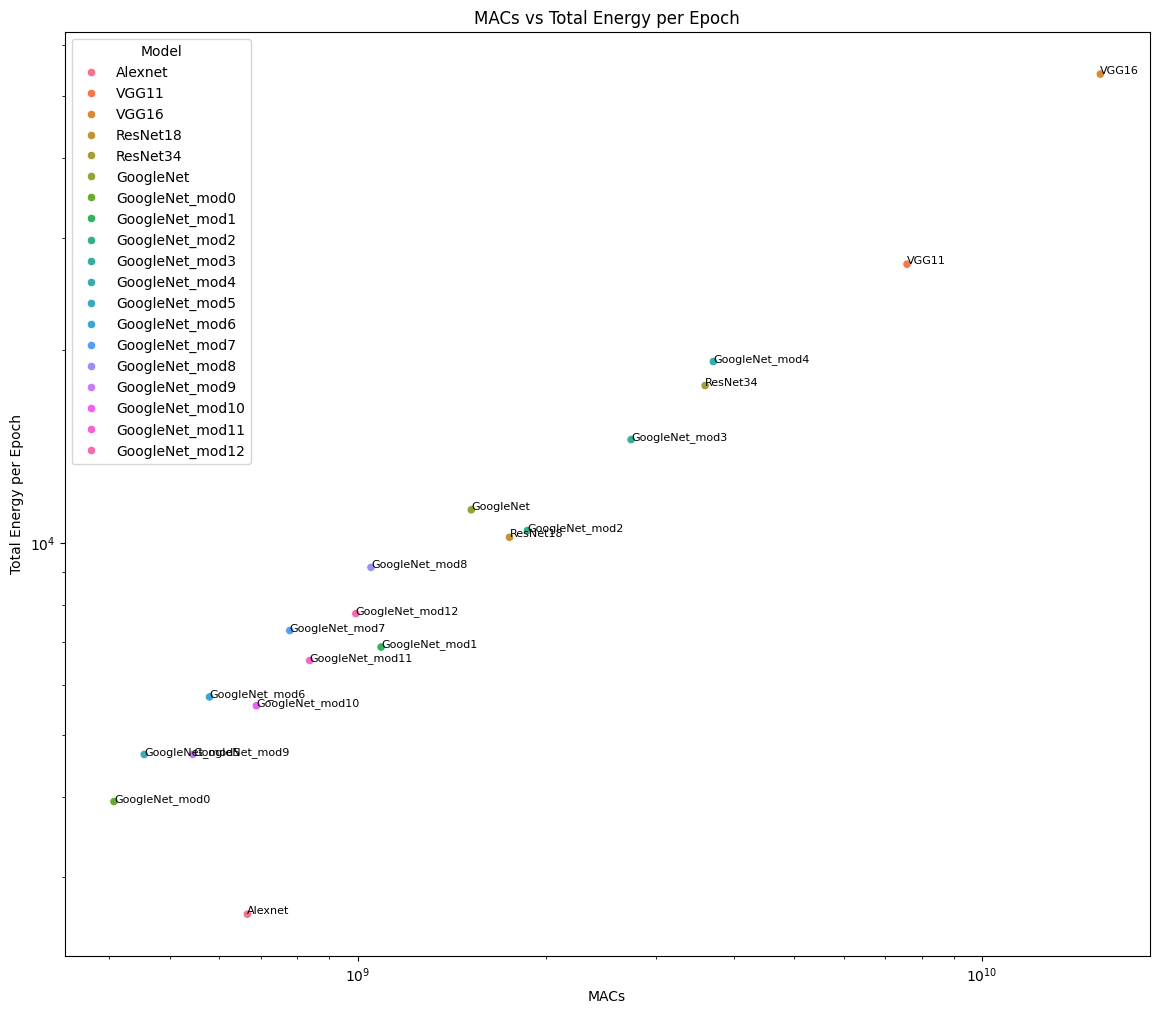

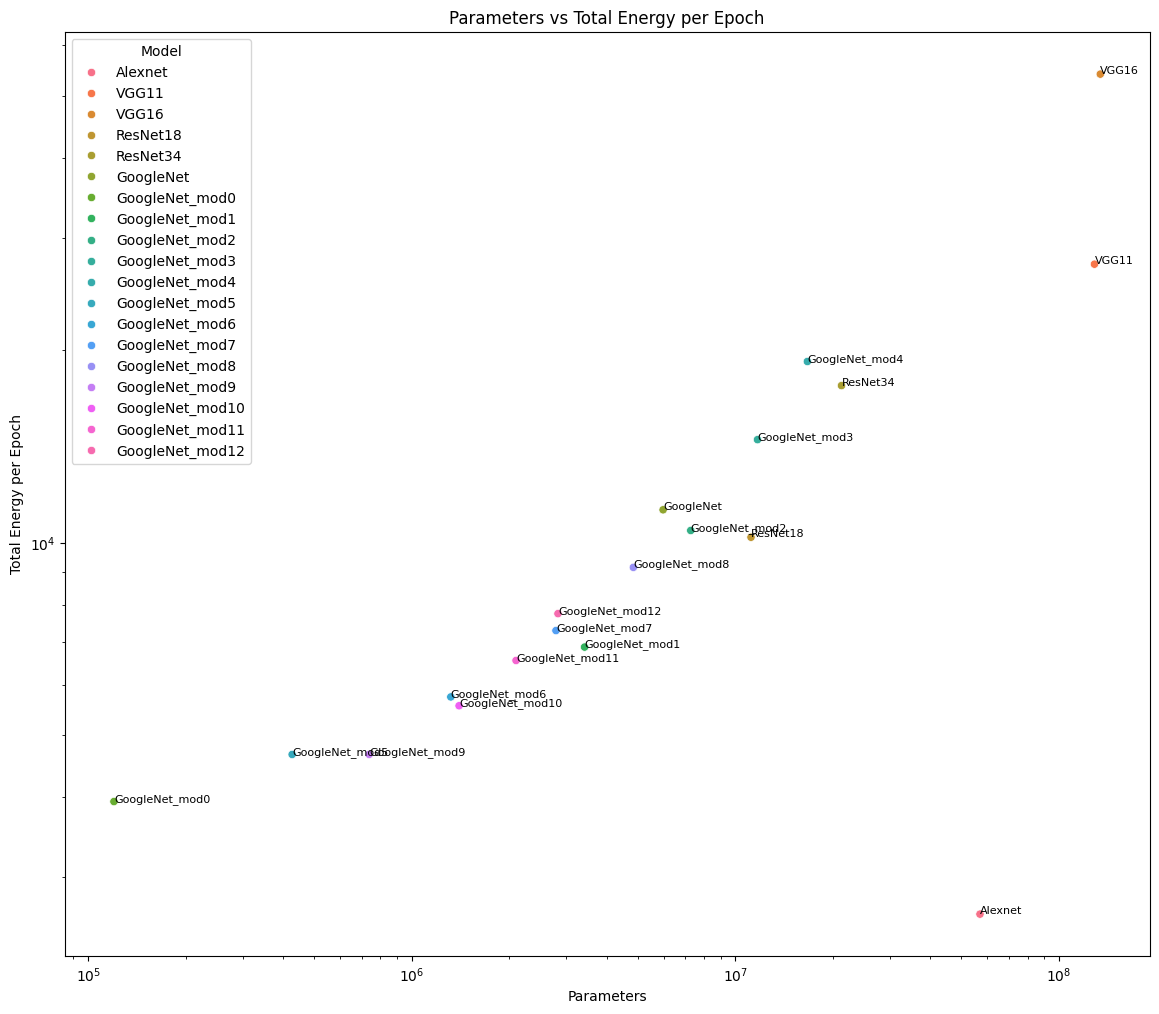

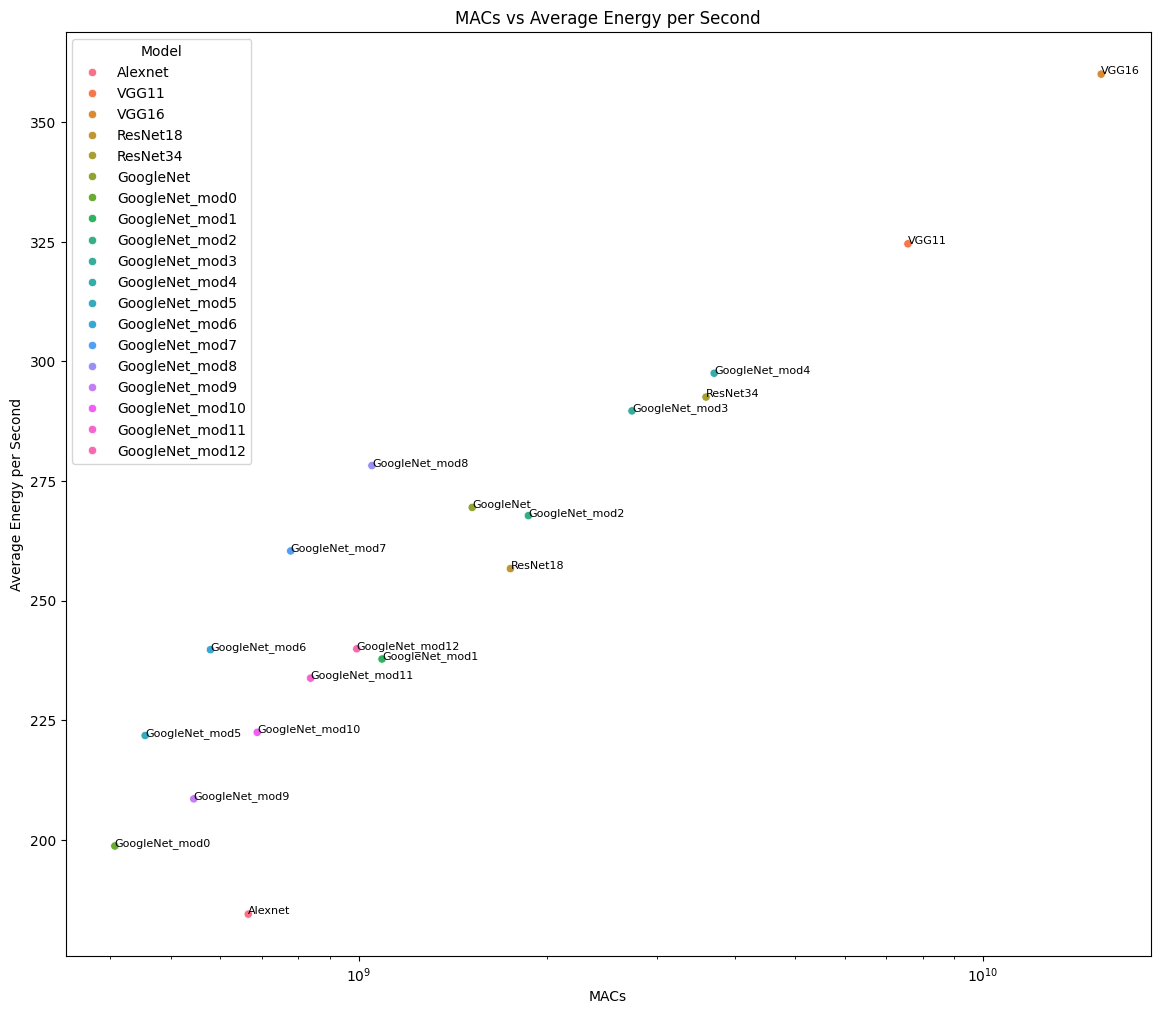

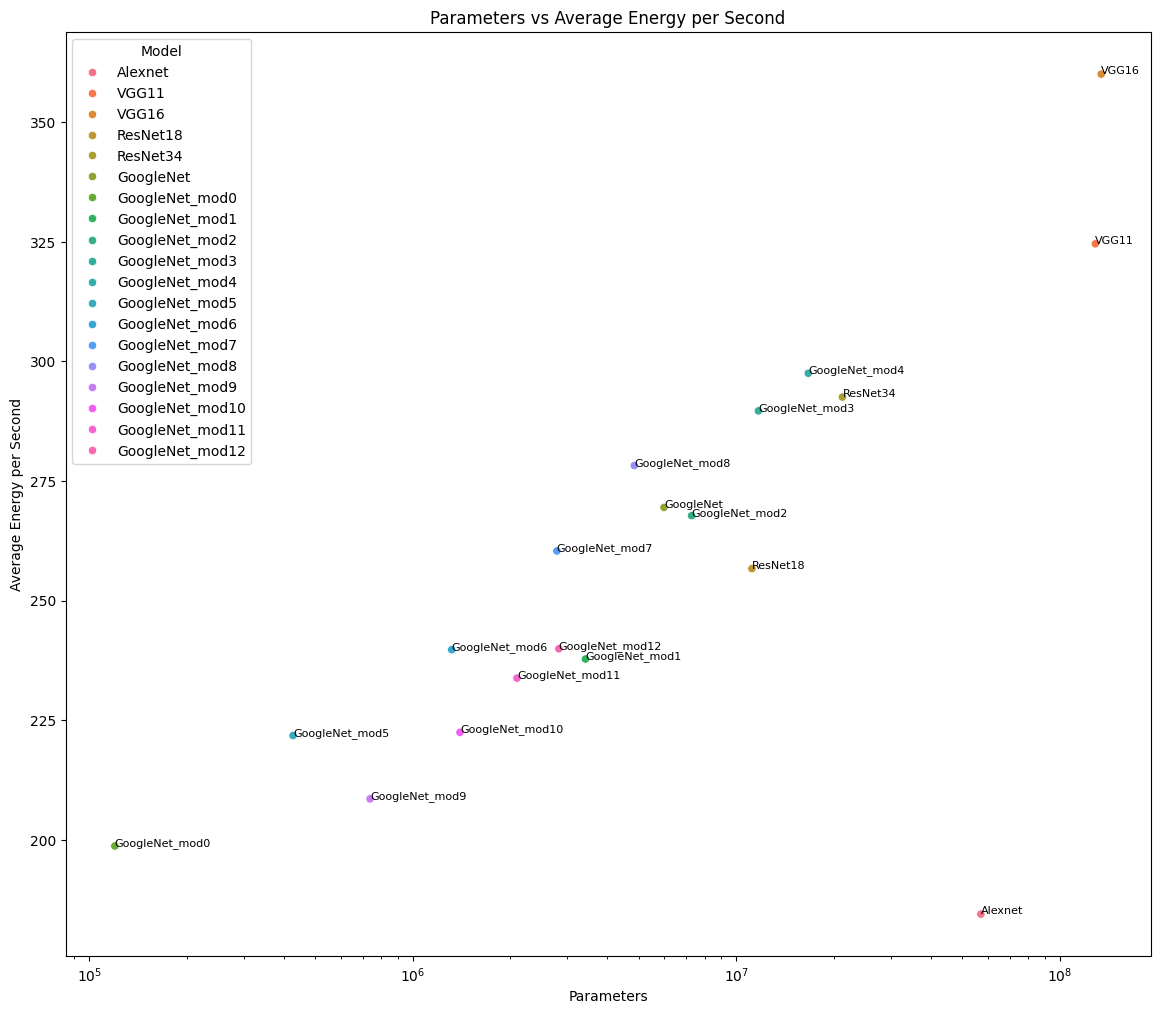

In [ ]:
plt.figure(figsize=(14,12))
# MACs vs Total Energy per Epoch
sns.scatterplot(data=df, x='MACs', y='TotalEnergyPerEpoch', hue='Model')
for i in range(df.shape[0]):    
    plt.text(df['MACs'][i], df['TotalEnergyPerEpoch'][i], df['Model'][i], fontsize=8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MACs')
plt.ylabel('Total Energy per Epoch')
plt.title('MACs vs Total Energy per Epoch')
plt.show()

plt.figure(figsize=(14,12))
# Parameters vs Total Energy per Epoch
sns.scatterplot(data=df, x='Parameters', y='TotalEnergyPerEpoch', hue='Model')
for i in range(df.shape[0]):
    plt.text(df['Parameters'][i], df['TotalEnergyPerEpoch'][i], df['Model'][i], fontsize=8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Parameters')
plt.ylabel('Total Energy per Epoch')
plt.title('Parameters vs Total Energy per Epoch')
plt.show()

plt.figure(figsize=(14, 12))
# MACs vs Average Energy per Epoch
sns.scatterplot(data=df, x='MACs', y='AverageEnergyPerSec', hue='Model')
for i in range(df.shape[0]):
    plt.text(df['MACs'][i], df['AverageEnergyPerSec'][i], df['Model'][i], fontsize=8)
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('MACs')
plt.ylabel('Average Energy per Second')
plt.title('MACs vs Average Energy per Second')
plt.show()

plt.figure(figsize=(14, 12))
# Parameters vs Average Energy per Epoch
sns.scatterplot(data=df, x='Parameters', y='AverageEnergyPerSec', hue='Model')
for i in range(df.shape[0]):
    plt.text(df['Parameters'][i], df['AverageEnergyPerSec'][i], df['Model'][i], fontsize=8)
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Parameters')
plt.ylabel('Average Energy per Second')
plt.title('Parameters vs Average Energy per Second')
plt.show()


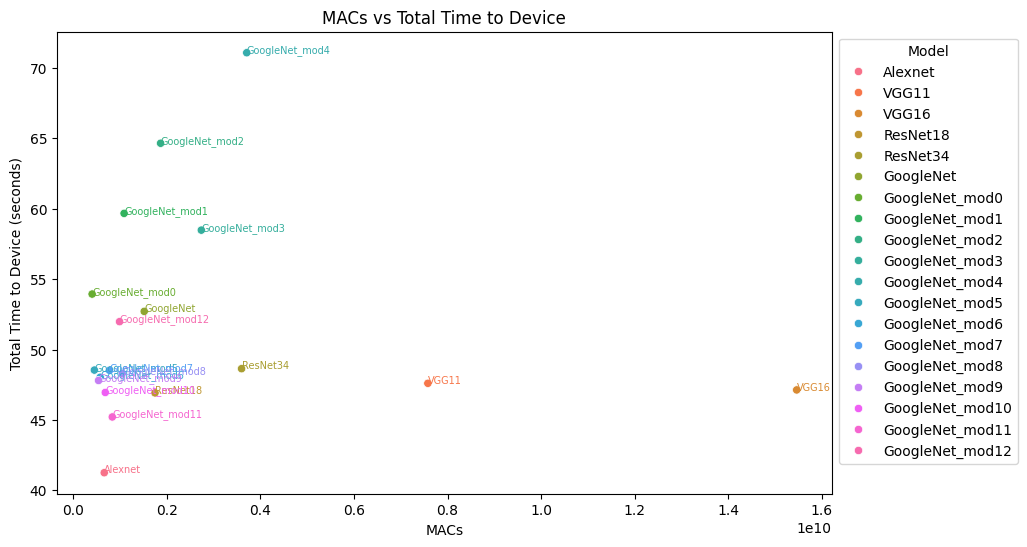

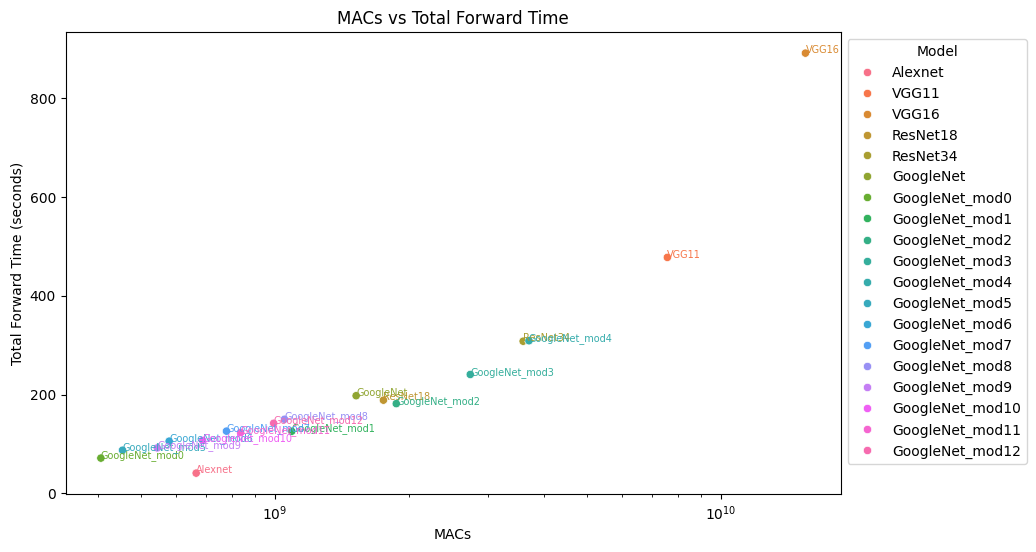

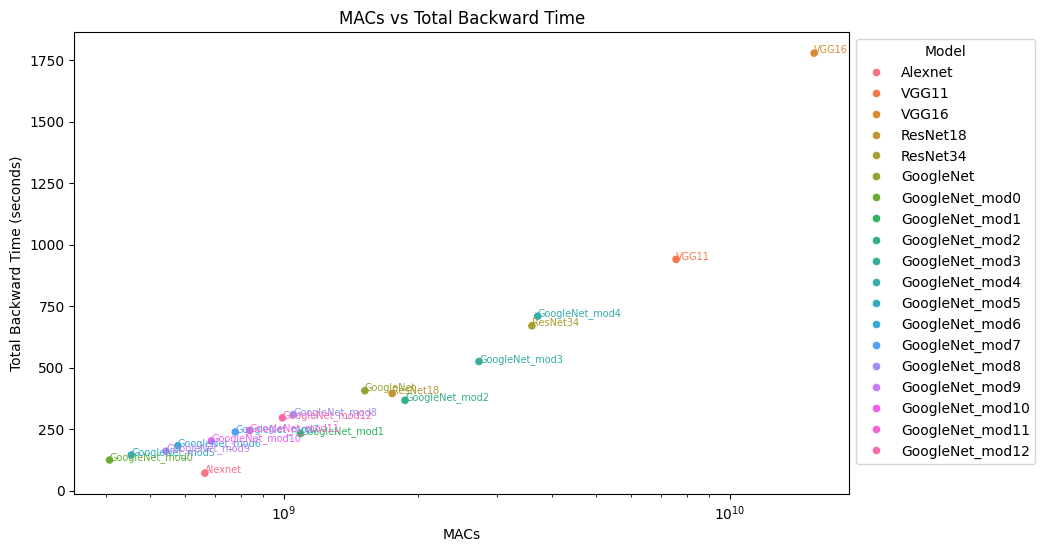

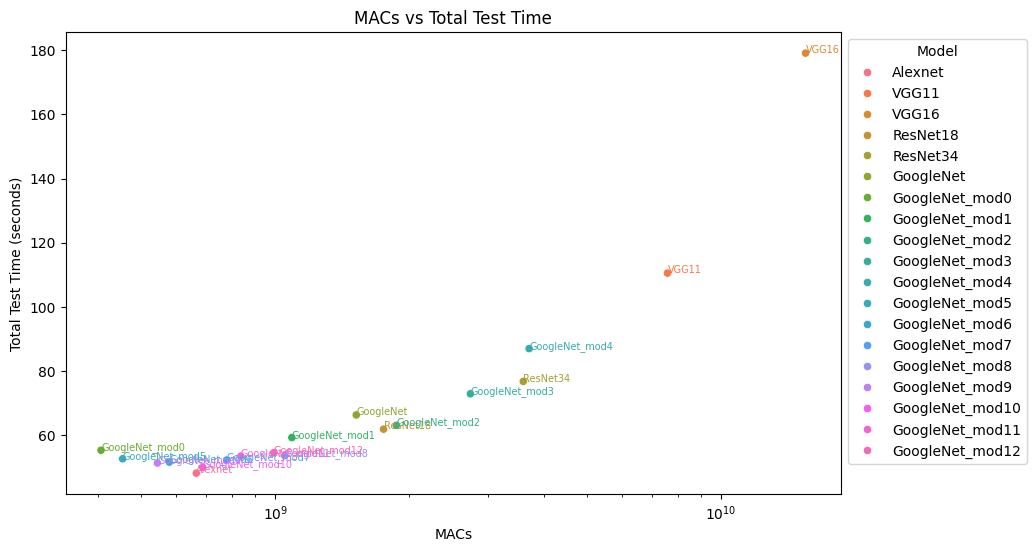

In [ ]:
# Define a color palette for the points
palette = sns.color_palette("husl", len(df))

# Plot 1: MACs vs Total Time to Device
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MACs', y='Total Time to Device', hue='Model', palette=palette)
for i in range(df.shape[0]):
    plt.text(df['MACs'][i], df['Total Time to Device'][i], df['Model'][i], fontsize=7, color=palette[i])
plt.xlabel('MACs')
plt.ylabel('Total Time to Device (seconds)')
plt.title('MACs vs Total Time to Device')
plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Plot 2: MACs vs Total Forward Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MACs', y='Total Forward Time', hue='Model', palette=palette)
for i in range(df.shape[0]):
    plt.text(df['MACs'][i], df['Total Forward Time'][i], df['Model'][i], fontsize=7, color=palette[i])
plt.xscale('log')
plt.xlabel('MACs')
plt.ylabel('Total Forward Time (seconds)')
plt.title('MACs vs Total Forward Time')
plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Plot 3: MACs vs Total Backward Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MACs', y='Total Backward Time', hue='Model', palette=palette)
for i in range(df.shape[0]):
    plt.text(df['MACs'][i], df['Total Backward Time'][i], df['Model'][i], fontsize=7, color=palette[i])
plt.xscale('log')
plt.xlabel('MACs')
plt.ylabel('Total Backward Time (seconds)')
plt.title('MACs vs Total Backward Time')
plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Plot 4: MACs vs Total Test Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MACs', y='Total Test Time', hue='Model', palette=palette)   
for i in range(df.shape[0]):
    plt.text(df['MACs'][i], df['Total Test Time'][i], df['Model'][i], fontsize=7, color=palette[i])
plt.xscale('log')
plt.xlabel('MACs')
plt.ylabel('Total Test Time (seconds)')
plt.title('MACs vs Total Test Time')
plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

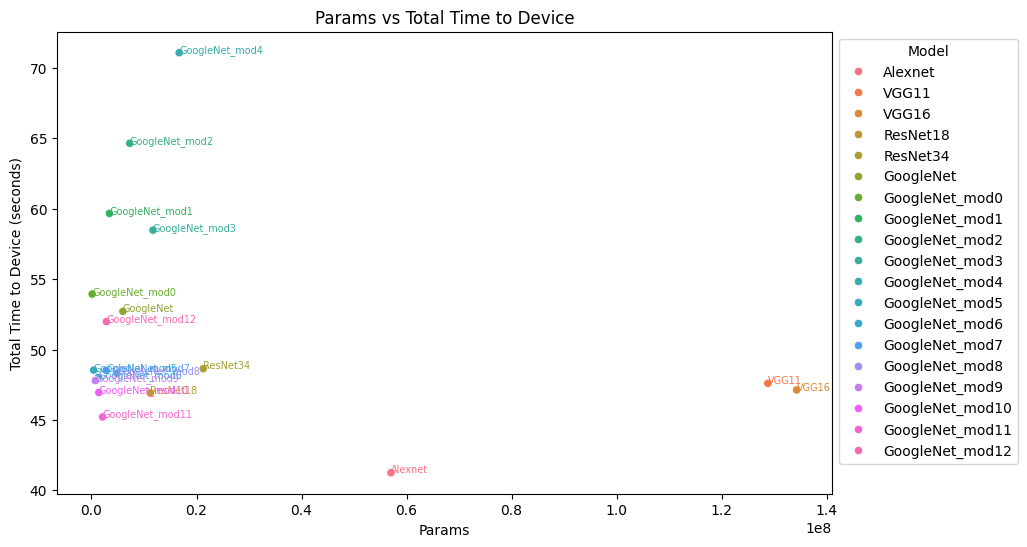

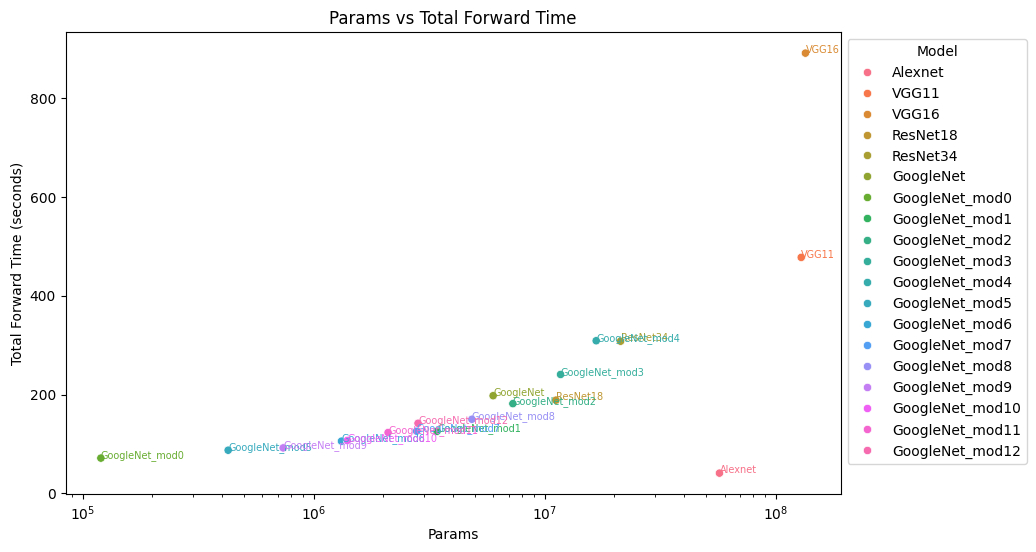

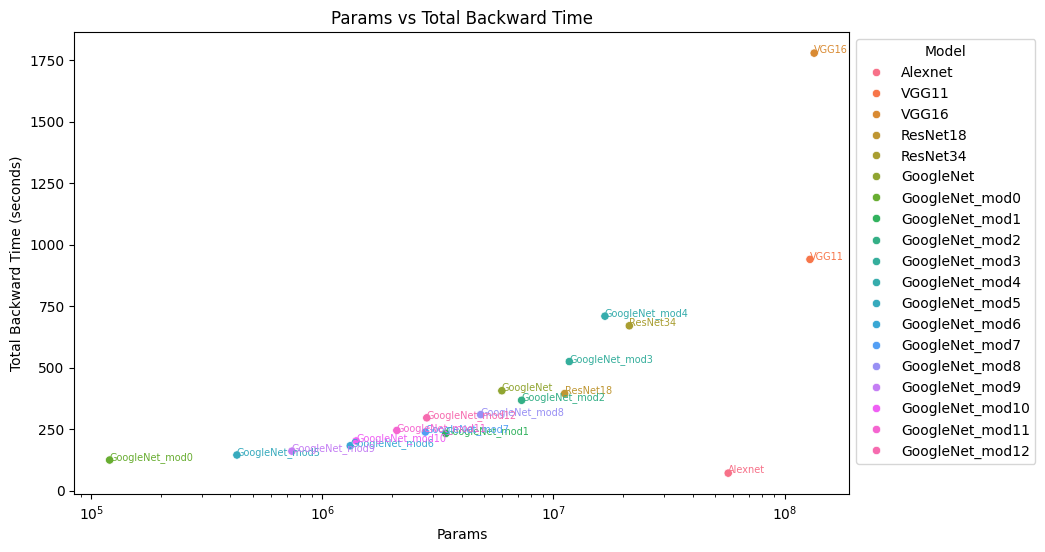

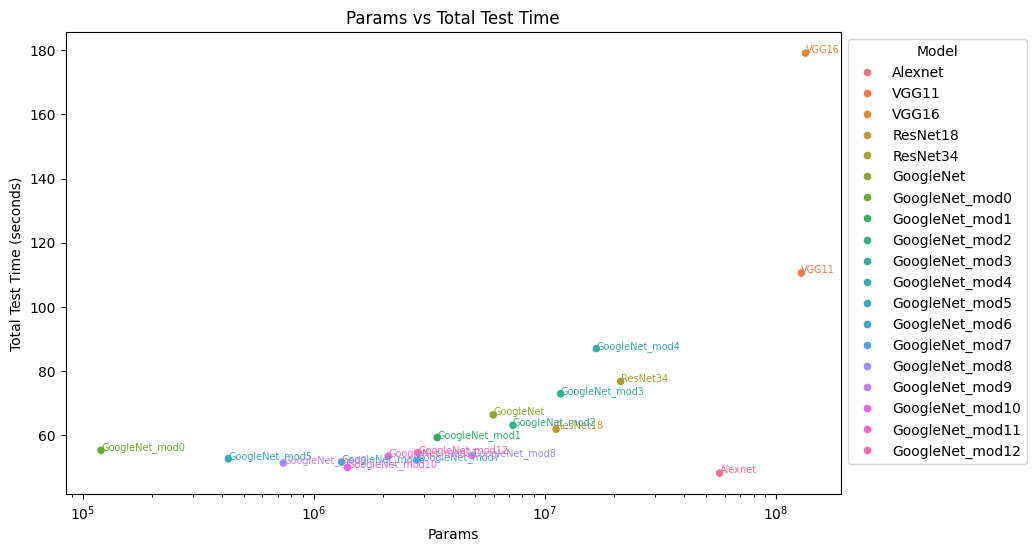

In [ ]:
# Define a color palette for the points
palette = sns.color_palette("husl", len(df))

# Plot 1: MACs vs Total Time to Device
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Parameters', y='Total Time to Device', hue='Model', palette=palette)
for i in range(df.shape[0]):
    plt.text(df['Parameters'][i], df['Total Time to Device'][i], df['Model'][i], fontsize=7, color=palette[i])
plt.xlabel('Params')
plt.ylabel('Total Time to Device (seconds)')
plt.title('Params vs Total Time to Device')
plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Plot 2: MACs vs Total Forward Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Parameters', y='Total Forward Time', hue='Model', palette=palette)
for i in range(df.shape[0]):
    plt.text(df['Parameters'][i], df['Total Forward Time'][i], df['Model'][i], fontsize=7, color=palette[i])
plt.xscale('log')
plt.xlabel('Params')
plt.ylabel('Total Forward Time (seconds)')
plt.title('Params vs Total Forward Time')
plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Plot 3: MACs vs Total Backward Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Parameters', y='Total Backward Time', hue='Model', palette=palette)
for i in range(df.shape[0]):
    plt.text(df['Parameters'][i], df['Total Backward Time'][i], df['Model'][i], fontsize=7, color=palette[i])
plt.xscale('log')
plt.xlabel('Params')
plt.ylabel('Total Backward Time (seconds)')
plt.title('Params vs Total Backward Time')
plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Plot 4: MACs vs Total Test Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Parameters', y='Total Test Time', hue='Model', palette=palette)   
for i in range(df.shape[0]):
    plt.text(df['Parameters'][i], df['Total Test Time'][i], df['Model'][i], fontsize=7, color=palette[i])
plt.xscale('log')
plt.xlabel('Params')
plt.ylabel('Total Test Time (seconds)')
plt.title('Params vs Total Test Time')
plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

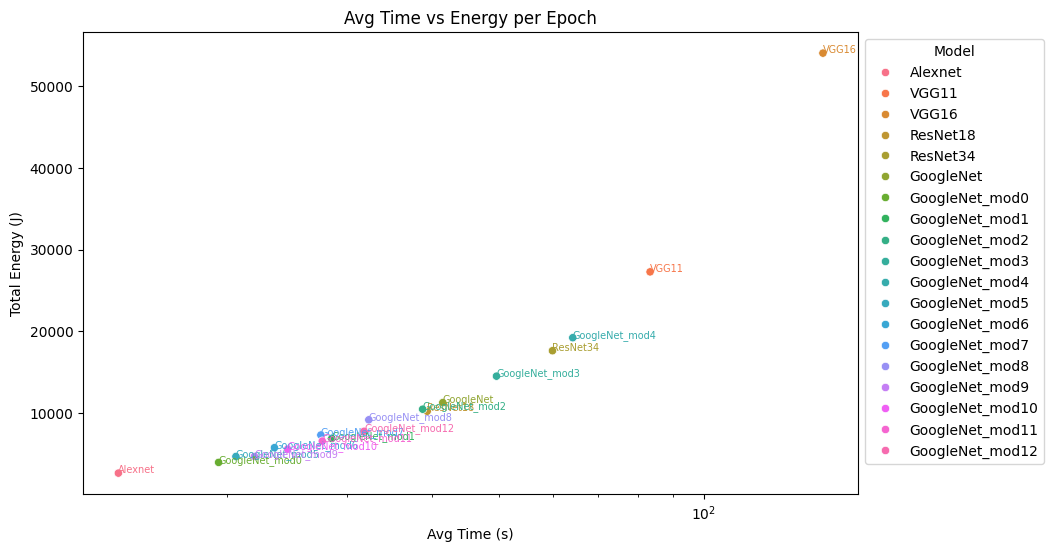

In [ ]:
# Total Time vs Total Energy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AverageTime', y='TotalEnergyPerEpoch', hue='Model', palette=palette)   
for i in range(df.shape[0]):
    plt.text(df['AverageTime'][i], df['TotalEnergyPerEpoch'][i], df['Model'][i], fontsize=7, color=palette[i])
plt.xscale('log')
plt.xlabel('Avg Time (s)')
plt.ylabel('Total Energy (J)')
plt.title('Avg Time vs Energy per Epoch')
plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()